In [31]:
import os
import sys
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt

from   astropy.table import Table

In [32]:
os.environ['CODE_ROOT'] = os.environ['HOME'] + '/DESI/'

sys.path.append(os.environ['CODE_ROOT'])

In [33]:
import pubplot

from   vmaxer import vmaxer
from   smith_kcorr import test_plots, test_nonnative_plots
from   cosmo import distmod, volcom
from   lumfn import lumfn
from   schechter import named_schechter

In [34]:
gama_zmax = Table.read(os.environ['HOME'] + '/data/GAMA4/gama_gold_zmax.fits')
gama_zmax

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,LUMDIST,DISTMOD,FIELD,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,ROTCARTESIAN_X,ROTCARTESIAN_Y,ROTCARTESIAN_Z,GMR,REST_GMR_0P1,REST_GMR_0P1_WARN,REST_GMR_0P1_INDEX,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0,Z_THETA_QALL,Z_THETA_QCOLOR,DDPKCORR_R0P1,DDPKCORR_G0P1,DDPKCORR_R0P0,DDPKCORR_G0P0,DDPMALL_0P0,DELTA_RPETRO_FAINT,ZMAX,ZMAX_WARN,DELTA_RPETRO_BRIGHT,ZMIN,ZMIN_WARN
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,Mpc,,,,,,,,,mag,,,,,,,,mag,mag,,,mag,mag,,,,,,,mag,mag,,,mag,,
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float64,float64,bytes4,float64,float64,float64,float64,float64,float64,float32,float64,int32,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float32,float64,float64
145370,587724650869424590,184.07136579,-1.32358369,19.757668,0.25259,4,G12_Y2_043_076,5,22.080845,20.799673,19.715944,19.217466,18.754766,900.9242608208261,39.773441410554724,G12,-717.2426326960315,-51.05231222144993,-16.61382031806361,717.6291331275127,45.02591353514238,-17.333382890609798,1.0837288,0.7285594201363752,0,5,0.03188022566607018,0.38704959581289816,0.2572116199882819,0.6987377571486637,0.6422026531228213,0.8,-0.24501231,-0.20207201,-20.027973175911583,-20.070913479594864,39.78564071741549,39.82858102109877,-0.018136127292337337,0.2929864983440387,0.1985887510698638,0.558161788057702,-19.969350306993164,0.042331696,0.2568651238567714,0.0,-7.7576675,0.008575081518012735,0.0
185283,587725041702404265,179.81367969,-1.44344015,17.63863,0.1776,4,G12_Y1_ES2_176,6,21.232393,18.853596,17.62541,17.174246,16.839668,605.1745403959566,38.90940324515192,G12,-513.7392097050786,1.6706359008534026,-12.945327764176431,513.6938150500158,-5.985814104726005,-13.460406104489508,1.2281857,1.0016501876639348,0,6,0.007215102000599924,0.2337505680231885,0.24113547452029133,0.6313944520450886,0.8379266761617261,0.8,-0.172272,-0.14208,-21.339636809605608,-21.369828812259684,38.978266722935686,39.00845872558976,-0.056220191422725344,0.0841634108641082,0.16050468693947578,0.3493387005777715,-21.259006022024792,2.1613693,0.3877542267728527,0.0,-5.63863,0.015508692888814346,0.0
324262,587726032765845787,135.29018285,1.64362359,19.070244,0.2528,4,G09_Y3_002_124,6,20.309467,19.612484,19.074047,18.871403,18.555456,901.7831530539876,39.77551058818591,G9,-511.34628444289405,506.19276513362564,20.64621966710471,507.0968424260573,-510.47004513349003,20.137772882235357,0.5384369,0.26461985491960105,0,2,-0.17223396174655822,0.10158307298227826,-0.006370113611200878,0.2603104477786615,0.2717563282585751,2.12,-0.245216,-0.53593594,-20.453680642025613,-20.162960700767183,39.523924477474836,39.233204536216405,-0.01802024084874479,0.29358549585910515,0.19870463751345632,0.5587607855727684,-20.65875539315027,0.7297554,0.37484395921262675,0.0,-7.070244,0.008987773290829029,0.0
642015,587725084111536338,140.45257789,-1.27235647,19.00664,0.18423,4,G09_Y4_224_348,6,20.860739,19.844563,19.031898,18.597075,18.322235,630.4197258741273,38.998148968983116,G9,-410.3894122040447,338.8697968950406,-11.8207279062243,407.51648458090267,-342.30497579924236,-12.229343522996182,0.81266403,0.6484950562962158,0,4,-0.043564791025629504,0.12060418466057654,0.17630662403466163,0.40262595988395344,0.58634469613313,2.12,-0.1787031,-0.39056757,-19.989113012937747,-19.7772485415022,38.99575249352856,38.783888022093016,-0.05287349502791182,0.10189654399716855,0.16385138333428928,0.36707183371083185,-19.976657772237374,0.79335976,0.2671738390203637,0.0,-7.0066395,0.007531578963332324,0.0
376710,587727943490404627,134.71383836,1.39456054,19.11182,0.05369,4,G09_Y2_034_166,6,20.253622,19.301306,19.010664,18.90907,18.725685,167.86705967607693,36.1248274174

In [35]:
gama_vmax = Table.read(os.environ['HOME'] + '/data/GAMA4/gama_gold_vmax.fits')
gama_vmax

ZGAMA,ZMIN,ZMAX,MCOLOR_0P0,DDPMALL_0P0_VISZ,FIELD,VMAX,VZ
,,,mag,,,,
float32,float64,float64,float64,float64,bytes4,float64,float64
0.25259,0.03903000056743622,0.2568651238567714,-20.070913479594864,-19.926703074443164,G12,7103110.015013753,6771916.293309597
0.1776,0.03903000056743622,0.26298999786376953,-21.369828812259684,-19.09696664691577,G12,7594841.612883208,2451953.0340828067
0.2528,0.03903000056743622,0.26298999786376953,-20.162960700767183,-19.928668684285306,G9,7594841.612883208,6787954.871692537
0.18423,0.03903000056743622,0.26298999786376953,-19.7772485415022,-19.182488036075494,G9,7594841.612883208,2728686.085465407
0.05369,0.03903000056743622,0.07376993210039659,-16.95407330783627,-16.335225053973392,G9,160811.095159269,45269.06604051025
0.11756,0.03903000056743622,0.26298999786376953,-20.386689392156104,-18.137096711867063,G12,7594841.612883208,718130.5028361797
0.10627,0.03903000056743622,0.14435970078257604,-18.43947674367367,-17.902963871855967,G15,1331522.1550925327,526779.9045800959
0.19171,0.03903000056743622,0.19519009605427107,-19.454264005686312,-19.27600611069928,G12,3227917.8519749925,3063655.5496006776


Text(0.5, 0, 'ZMAX')

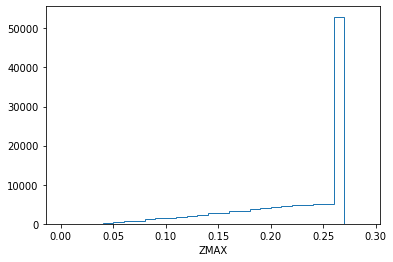

In [36]:
_ = pl.hist(gama_vmax['ZMAX'], bins=np.arange(0.0, 0.3, 0.01), histtype='step')
pl.xlabel('ZMAX')

In [37]:
np.unique(gama_vmax['ZMIN'].data)

array([0.03903   , 0.03981007])

Text(0, 0.5, '$z_{\\rm max}$')

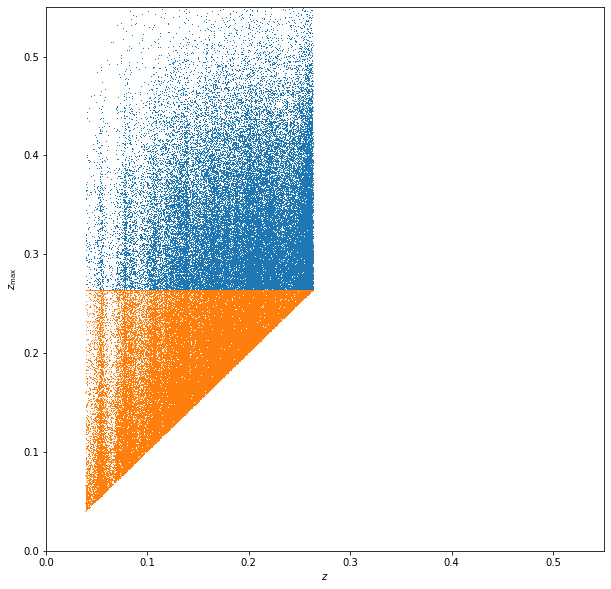

In [38]:
fig, ax = plt.subplots(1,1,figsize=(10,10))

ax.plot(gama_zmax['ZGAMA'], gama_zmax['ZMAX'], marker=',', lw=0.0)
ax.plot(gama_vmax['ZGAMA'], gama_vmax['ZMAX'], marker=',', lw=0.0)

# ax.axvline(zmin, c='k', lw=0.5) 
# ax.axvline(zmax, c='k', lw=0.5) 
 
# ax.axhline(zmin, c='k', lw=0.5) 
# ax.axhline(zmax, c='k', lw=0.5) 

ax.set_xlim(0.0, 0.55)
ax.set_ylim(0.0, 0.55)

ax.set_xlabel(r'$z$')
ax.set_ylabel(r'$z_{\rm max}$')

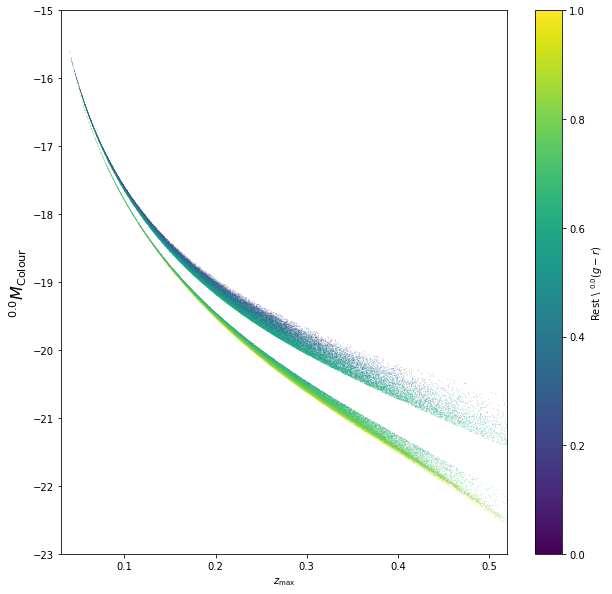

In [39]:
fig, ax = plt.subplots(1,1,figsize=(10,10))

sc = ax.scatter(gama_zmax['ZMAX'], gama_zmax['MCOLOR_0P0'], marker='.', lw=0.0, s=1, c=gama_zmax['REST_GMR_0P0'], vmin=0.0, vmax=1.0)

ax.set_xlim(0.03, 0.52)
ax.set_ylim(-23., -15.)

ax.set_xlabel(r'$z_{\rm max}$')
ax.set_ylabel(r'$^{0.0}M_{\rm Colour}$', fontsize=16)

plt.colorbar(sc, label='Rest \ $^{0.0}(g-r)$')

Text(0, 0.5, 'DEC [deg.]')

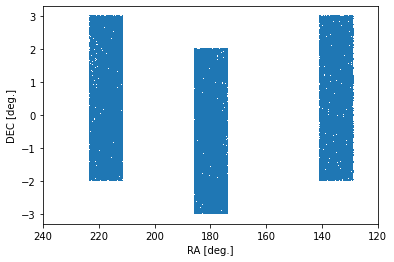

In [40]:
pl.plot(gama_zmax['RA'], gama_zmax['DEC'], marker=',', lw=0.0)

pl.xlim(240., 120.)

pl.xlabel('RA [deg.]')
pl.ylabel('DEC [deg.]')

In [41]:
gama_lf = Table.read(os.environ['HOME'] + '/data/GAMA4/gama_gold_lumfn.fits')
gama_lf

MEDIAN_M,PHI_N,PHI_N_ERROR,PHI_IVMAX,PHI_IVMAX_ERROR,N,V_ON_VMAX
float64,float64,float64,float64,float64,float64,float64
-25.4,0.0,0.0,0.0,0.0,0.0,--
-25.200000000000003,0.0,0.0,0.0,0.0,0.0,--
-25.0,0.0,0.0,0.0,0.0,0.0,--
-24.800000000000004,0.0,0.0,0.0,0.0,0.0,--
-24.6,0.0,0.0,0.0,0.0,0.0,--
-24.400000000000006,0.0,0.0,0.0,0.0,0.0,--
-24.200000000000003,0.0,0.0,0.0,0.0,0.0,--
-24.000000000000007,0.0,0.0,0.0,0.0,0.0,--
-23.800000000000004,0.0,0.0,0.0,0.0,0.0,--


/tmp/ipykernel_252331/3573005910.py:6: RuntimeWarning: divide by zero encountered in log10
  pl.plot(gama_lf['MEDIAN_M'], np.log10(gama_lf['PHI_N']), label='RAW', lw=1.)
/tmp/ipykernel_252331/3573005910.py:7: RuntimeWarning: divide by zero encountered in log10
  pl.plot(gama_lf['MEDIAN_M'], np.log10(gama_lf['PHI_IVMAX']), label='IVMAX', lw=1.)


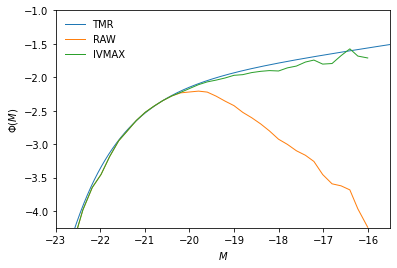

In [42]:
Ms = np.arange(-23., -15., 0.01)
sc = named_schechter(Ms, named_type='TMR')

pl.plot(Ms, np.log10(sc), label='TMR', lw=1.)

pl.plot(gama_lf['MEDIAN_M'], np.log10(gama_lf['PHI_N']), label='RAW', lw=1.)
pl.plot(gama_lf['MEDIAN_M'], np.log10(gama_lf['PHI_IVMAX']), label='IVMAX', lw=1.)

pl.xlabel(r'$M$')
pl.ylabel(r'$\Phi(M)$')

pl.ylim(-4.25, -1.)
pl.xlim(-23., -15.5)

pl.legend(frameon=False, loc=2)

Text(0.5, 0, '$V/V_{Max}$')

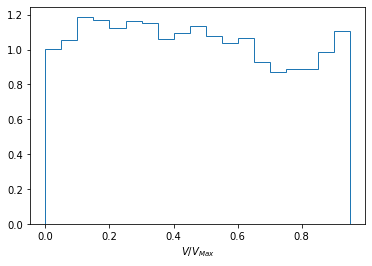

In [43]:
_ = pl.hist(gama_vmax['VZ'] / gama_vmax['VMAX'], bins=np.arange(0.0, 1.0, 0.05), histtype='step', density=True)

pl.xlabel('$V/V_{Max}$')

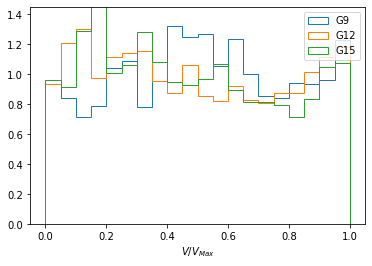

In [58]:
fields = ['G9', 'G12', 'G15']
for field in fields:
    field_vmax = gama_vmax[gama_vmax['FIELD'] == field]
    _ = pl.hist(field_vmax['VZ'] / field_vmax['VMAX'], bins=np.arange(0.0, 1.001, 0.05), histtype='step', density=True, label=field)

pl.legend()
pl.xlabel('$V/V_{Max}$')
pl.ylim(0, 1.45)
pl.show()


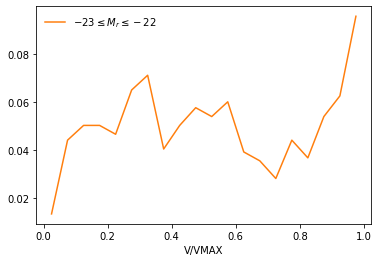

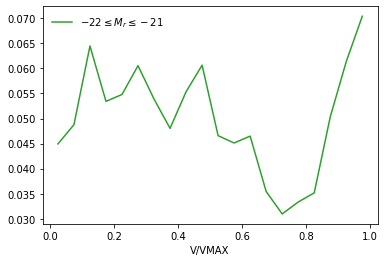

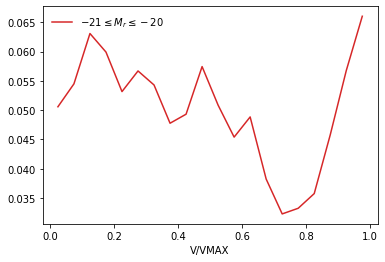

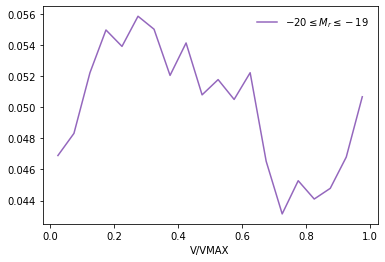

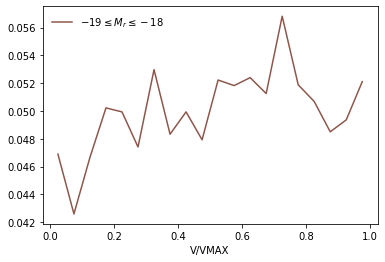

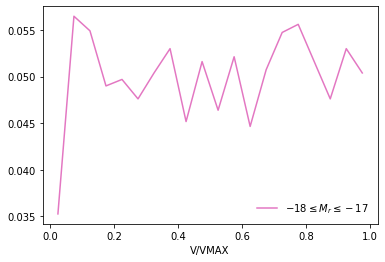

In [45]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
idx    = np.digitize(gama_vmax['MCOLOR_0P0'], np.arange(-23., -17., 1.))

for count, jj in enumerate(np.unique(idx)):
    sample = gama_vmax[(idx == jj) & (gama_vmax['MCOLOR_0P0'].data >= -23.) & (gama_vmax['MCOLOR_0P0'].data <= -17.)]
    nsample = len(sample)

    if nsample == 0:
        continue
    
    dbin = 0.05
    bins = np.arange(0., 1.001, dbin)
    
    ns, _ = np.histogram(sample['VZ'] / sample['VMAX'], bins=bins)
    
    centres = bins[:-1] + dbin/2.
    
    plt.plot(centres, ns / nsample, color=colors[count], label=r'${:.0f} \leq M_r \leq {:.0f}$'.format(sample['MCOLOR_0P0'].min(),\
                                                                                                       sample['MCOLOR_0P0'].max()))

    plt.xlabel('V/VMAX')
    plt.legend(frameon=False)
    
    pl.show()

In [46]:
spurious = gama_zmax[gama_zmax['ZMAX_WARN'] > 0.0]
spurious.sort('R_PETRO')
spurious

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,LUMDIST,DISTMOD,FIELD,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,ROTCARTESIAN_X,ROTCARTESIAN_Y,ROTCARTESIAN_Z,GMR,REST_GMR_0P1,REST_GMR_0P1_WARN,REST_GMR_0P1_INDEX,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0,Z_THETA_QALL,Z_THETA_QCOLOR,DDPKCORR_R0P1,DDPKCORR_G0P1,DDPKCORR_R0P0,DDPKCORR_G0P0,DDPMALL_0P0,DELTA_RPETRO_FAINT,ZMAX,ZMAX_WARN,DELTA_RPETRO_BRIGHT,ZMIN,ZMIN_WARN
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,Mpc,,,,,,,,,mag,,,,,,,,mag,mag,,,mag,mag,,,,,,,mag,mag,,,mag,,
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float64,float64,bytes4,float64,float64,float64,float64,float64,float64,float32,float64,int32,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float32,float64,float64
185322,587725041702469675,179.83440251,-1.64817036,14.160493,0.08135,5,372775163474765824,6,17.064615,15.692654,14.905519,14.343366,14.213043,259.6079029836754,37.07158954561004,G12,-239.97727236461046,0.6935893874232879,-6.905119636685518,239.95593630894075,-2.7092935591663565,-7.1457227418616585,0.7871351,0.8222150124783408,0,5,-0.12544319185352298,-0.160523080125354,0.10303089196510218,0.18560737233721386,0.7045586438344313,0.8,-0.0789095,-0.06508,-22.935218039108076,-22.949047538591184,37.09571093614177,37.10954043562488,-0.11872379703855176,-0.14155580081515584,0.09800108132364935,0.12361948889850743,-22.930188228466623,5.6395063,-99.0,2.0,-2.160493,0.03154120966707457,0.0
178839,587725041166581794,182.1835035,-2.07231294,14.328211,0.10734,4,G12_Y6_041_249,6,24.575645,17.823496,16.785114,15.850774,18.088587,348.95950671254064,37.71387517159247,G12,-314.6983622428863,-11.998751500068654,-11.395465440223349,314.7764615969768,9.35496746422525,-11.711092038957487,1.0383816,1.0190980480456595,0,6,-0.09298329526027885,-0.07369976676785223,0.14283969236353414,0.32678700770193425,0.8544342611996858,0.8,-0.1041198,-0.085872,-23.424384233236342,-23.442632031321555,37.75259506392482,37.770842862010035,-0.09801980357535564,-0.0876437071781144,0.11870507478684547,0.17753158253554888,-23.400249615659654,5.4717884,-99.0,2.0,-2.3282108,0.039334234229219986,0.0
125489,587724649258876969,184.17810296,-2.69967347,14.425353,0.25162,4,G12_Y4_203_103,6,15.559951,15.755173,14.309496,28.205227,16.762774,896.9591792306916,39.76386339337955,G12,-713.9407537359408,-52.154217318169536,-33.75421886554996,714.3194415688174,46.155514435440104,-34.47047148430874,1.4456768,0.9922763000644923,0,6,0.11573660675273972,0.5691371102771148,0.34863479662419555,0.9652536473961288,0.829057952816934,0.8,-0.24407141,-0.201296,-25.44307373066556,-25.48584913809907,39.868426780897494,39.911202188331,-0.018670125386448577,0.29021962938141105,0.19805475297575253,0.5553949190950743,-25.292493687017117,5.374646,-99.0,2.0,-2.425353,0.09538586652718395,0.0
718921,587726031728017438,217.2773885,1.28502947,14.456577,0.08647,3,NED_MRK_1383,4,14.399254,14.418312,14.378856,13.8610735,14.046887,276.9712644440074,37.212173568413235,G15,-202.7981329939006,-154.36433581903054,5.717037181843526,204.09321717251248,152.65545385094066,5.512399344915336,0.039456367,0.05020904994649686,0,1,-0.0982779198530405,-0.10903060230686158,0.06300279945333358,0.018814009181763167,0.08364515776424619,2.12,-0.0838759,-0.1833164,-22.734723164844088,-22.635282672154478,37.19130046586948,37.09185997317987,-0.11433057873334761,-0.13142393692472373,0.1023942996288535,0.13375135278893954,-22.774114665019606,5.343422,1.1327446851177603,1.0,-2.4565773,0.027777561711799695,0.0
423776,587728879796093009,137.38205797,2.9559053,14.904024,0.14906,4,G09_Y1_FX1_283,6,16.738531,15.69086,14.949677,14.424865,14.620418,498.5745074806278,38.488650344529816,G9,-318.87403319626134,293.4

In [47]:
spurious = gama_zmax[gama_zmax['ZMIN_WARN'] > 0.0]
spurious.sort('R_PETRO')
spurious

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,LUMDIST,DISTMOD,FIELD,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,ROTCARTESIAN_X,ROTCARTESIAN_Y,ROTCARTESIAN_Z,GMR,REST_GMR_0P1,REST_GMR_0P1_WARN,REST_GMR_0P1_INDEX,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0,Z_THETA_QALL,Z_THETA_QCOLOR,DDPKCORR_R0P1,DDPKCORR_G0P1,DDPKCORR_R0P0,DDPKCORR_G0P0,DDPMALL_0P0,DELTA_RPETRO_FAINT,ZMAX,ZMAX_WARN,DELTA_RPETRO_BRIGHT,ZMIN,ZMIN_WARN
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,Mpc,,,,,,,,,mag,,,,,,,,mag,mag,,,mag,mag,,,,,,,mag,mag,,,mag,,
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float64,float64,bytes4,float64,float64,float64,float64,float64,float64,float32,float64,int32,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float32,float64,float64


# Done.